<a href="https://colab.research.google.com/github/SureshkumarRadadiya/predict-credit-card-approval-based-on-customer-information/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business objective**

This app predicts if an applicant will be approved for a credit card or not. Each time there is a hard enquiry your credit score is affected negatively. This app predict the probability of being approved without affecting your credit score. This app can be used by applicant who wants to find out if they will be approved for a credit card without affecting their credit score.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame

**import csv file**

In [2]:
cc_data_full_data  = pd.read_csv('Credit_card.csv')
credit_status  = pd.read_csv('Credit_card_label.csv')

In [3]:
df=pd.merge(cc_data_full_data,credit_status,how='left',on='Ind_ID')

**Knowing the data**

In [4]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [6]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


**Inspect missing values in the dataset**

In [7]:
df.head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2,1
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1


In [8]:
df.tail(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1538,5125816,F,Y,N,0,450000.0,Pensioner,Higher education,Married,House / apartment,-19783.0,-5521,1,1,1,0,Managers,2,0
1539,5149946,F,N,Y,0,180000.0,Working,Higher education,Married,House / apartment,-22228.0,-686,1,1,1,0,High skill tech staff,2,0
1540,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,-12903.0,-2924,1,0,0,0,Accountants,3,0
1541,5117065,F,N,Y,2,225000.0,Working,Higher education,Married,House / apartment,NaN,-1648,1,1,1,0,Accountants,4,0
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3,0
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [9]:
# for each of the categorical columns, lets see the unique values
for i in df.columns:
    #print(i)
    if df[i].dtype==object:
        print(df[i].unique())

['M' 'F' nan]
['Y' 'N']
['Y' 'N']
['Pensioner' 'Commercial associate' 'Working' 'State servant']
['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
[nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'High skill tech staff' 'Managers' 'Cleaning staff' 'Drivers'
 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff' 'Security staff'
 'Medicine staff' 'Private service staff' 'HR staff' 'Secretaries'
 'Realty agents']


In [10]:
## Lets modify the functions to make them more readable

def missing_values(df):
    ''' This function takes a data frame as input
    prints the fraction of entries with missing values (NaN)
    prints the list of columns with corresponding number of missing values
    '''
    # Total number of entries (rows X columns) in the dataset
    total= df.size
    #Number of missing values per column
    missingCount = df.isnull().sum()
    #Total number of missing values
    missing_tot = missingCount.sum()
    # Calculate percentage of missing values
    #print('general info of dataframe \n\n\n\n',df.info())
    print(f'Total number of missing values for each column of dataframe: \n \b \b \b',missingCount)
    print("The dataset contains", round(((missing_tot/total) * 100), 2), "%", "missing values.\n\n\n")


def column_missingdata(df):
    ''' This function takes a data frame as input
    prints the list of columns with corresponding % of missing values
    '''
    #check for missing values per column
    values=df.isnull().sum()#.sort_values(ascending=False)
    total= df.size
    #percentage of missing values per column
    percentage=(values/total) * 100
    print(f'% of missing values for each column of dataframe: \n \b \b \b',percentage,'\n\n\n')

def plot_missingdata(df:pd.DataFrame, title:str, xlabel:str, ylabel:str):
    ''' This function takes a data frame as input
    plots the list of columns with corresponding total number of missing values
    '''
    # Let us see what columns have missing values
    # total number of missing values for each dataframe column
    missing = df.isnull().sum()
    # keeping only the columns with missing values>0
    missing = missing[missing > 0]
    # sorting in order of missing values and making the change to original missing series
    missing.sort_values(inplace=True)
    missing.plot.bar(color='blue')
    plt.title(title, size=15)
    plt.xticks(fontsize=11,rotation=45)
    plt.yticks(fontsize=11)
    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.show()

Total number of missing values for each column of dataframe: 
    Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64
The dataset contains 1.84 % missing values.



% of missing values for each column of dataframe: 
    Ind_ID             0.000000
GENDER             0.023800
Car_Owner          0.000000
Propert_Owner      0.000000
CHILDREN           0.000000
Annual_income      0.078199
Type_Income        0.000000
EDUCATION          0.000000
Marital_status     0.000000
Housing_type       0.000000
Birthday_count     0.074799
Employed_days      0.000000
Mobile_phone       0.000000
Work_Phone  

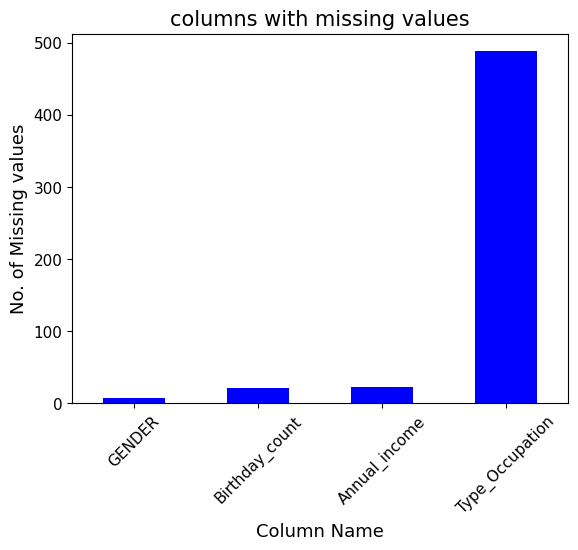

In [11]:
missing_values(df)
column_missingdata(df)
plot_missingdata(df,'columns with missing values','Column Name','No. of Missing values')

In [12]:
def fix_missing_mean(df,col):
    ''' This function takes a data frame as input
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mean
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mean(), inplace = True)

def fix_missing_mode(df,col):
    ''' This function takes a data frame as input
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mode
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mode(), inplace = True)


def fix_missing_ffill(df, col):
    ''' This function takes a data frame as input
    replaces the missing values of a particular column with the value from the previous row
    '''
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(method='ffill')

def fix_missing_bfill(df, col):
    ''' This function takes a data frame as input
    replaces the missing values of a particular column with the value from the next row
    '''
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(method='bfill')

In [13]:
fix_missing_ffill(df,'GENDER')
fix_missing_mean(df,'Annual_income')
fix_missing_mean(df,'Birthday_count')
missing_values(df)

Total number of missing values for each column of dataframe: 
    Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64
The dataset contains 1.66 % missing values.





In [14]:
ds = df.drop('Type_Occupation', axis=1)

In [15]:
ds.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,2,1


In [16]:
# Separate target from features
y = ds['label']
features = ds.drop(['label'], axis=1)
# Preview features
features.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,2
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,2
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,2
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,2
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,2


<ipython-input-17-c8c3aa3622e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x='label',edgecolor="white",palette="viridis",order=ds["label"].value_counts().index)


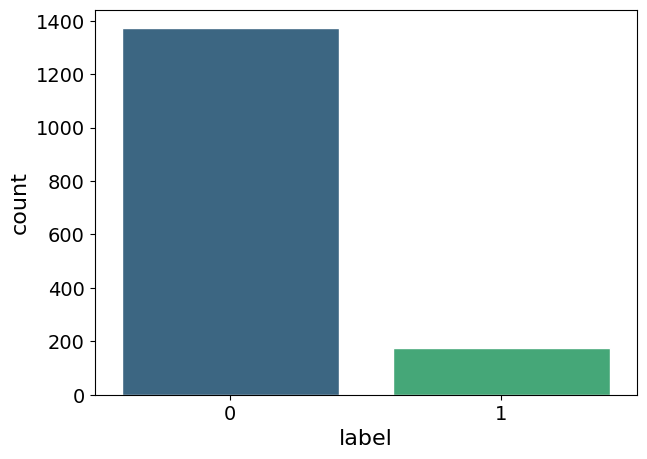

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex=True)
sns.countplot(data=ds, x='label',edgecolor="white",palette="viridis",order=ds["label"].value_counts().index)
total = df['label'].value_counts().sum()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('label', fontsize=16)
plt.ylabel('count', fontsize=16)

plt.show()

**Preprocessing the data**

In [18]:
# List of categorical columns
object_cols = ['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type']

# ordinal-encode categorical columns
X = features.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])

# Preview the ordinal-encoded features
X.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
0,5008827,1.0,1.0,1.0,0,180000.00000,1.0,1.0,1.0,1.0,-18772.000000,365243,1,0,0,0,2
1,5009744,0.0,1.0,0.0,0,315000.00000,0.0,1.0,1.0,1.0,-13557.000000,-586,1,1,1,0,2
2,5009746,0.0,1.0,0.0,0,315000.00000,0.0,1.0,1.0,1.0,-16040.342071,-586,1,1,1,0,2
3,5009749,0.0,1.0,0.0,0,191399.32623,0.0,1.0,1.0,1.0,-13557.000000,-586,1,1,1,0,2
4,5009752,0.0,1.0,0.0,0,315000.00000,0.0,1.0,1.0,1.0,-13557.000000,-586,1,1,1,0,2


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   int64  
 1   GENDER          1548 non-null   float64
 2   Car_Owner       1548 non-null   float64
 3   Propert_Owner   1548 non-null   float64
 4   CHILDREN        1548 non-null   int64  
 5   Annual_income   1548 non-null   float64
 6   Type_Income     1548 non-null   float64
 7   EDUCATION       1548 non-null   float64
 8   Marital_status  1548 non-null   float64
 9   Housing_type    1548 non-null   float64
 10  Birthday_count  1548 non-null   float64
 11  Employed_days   1548 non-null   int64  
 12  Mobile_phone    1548 non-null   int64  
 13  Work_Phone      1548 non-null   int64  
 14  Phone           1548 non-null   int64  
 15  EMAIL_ID        1548 non-null   int64  
 16  Family_Members  1548 non-null   int64  
dtypes: float64(9), int64(8)
memory us

<Axes: >

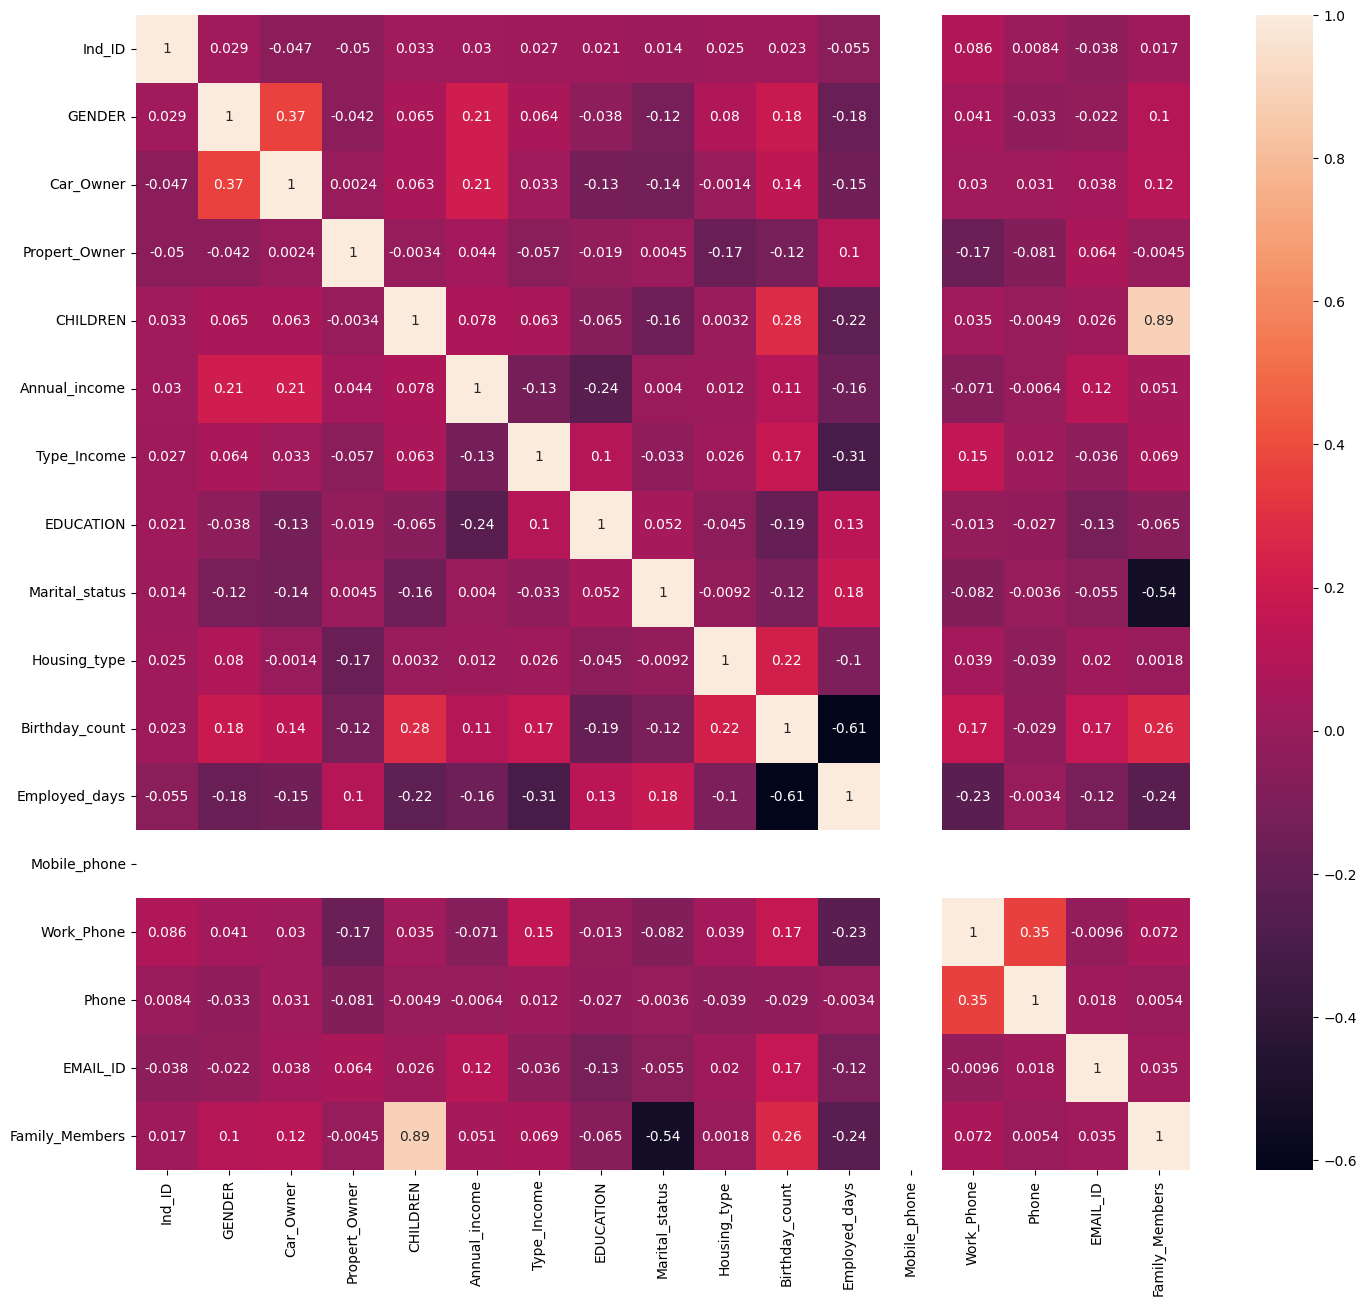

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(17,15))
sns.heatmap(X.corr(), annot = True)

In [21]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y,test_size=0.30,random_state=2)

#**Classifiers**
**Decision Tree**

1 Train score: 0.8855032317636196 Test score: 0.8903225806451613
2 Train score: 0.8882733148661126 Test score: 0.8903225806451613
3 Train score: 0.8882733148661126 Test score: 0.8903225806451613
4 Train score: 0.8928901200369345 Test score: 0.8946236559139785
5 Train score: 0.9012003693444137 Test score: 0.8946236559139785
6 Train score: 0.9122807017543859 Test score: 0.8774193548387097
7 Train score: 0.9224376731301939 Test score: 0.8709677419354839
8 Train score: 0.9335180055401662 Test score: 0.8795698924731182
9 Train score: 0.9436749769159741 Test score: 0.8666666666666667


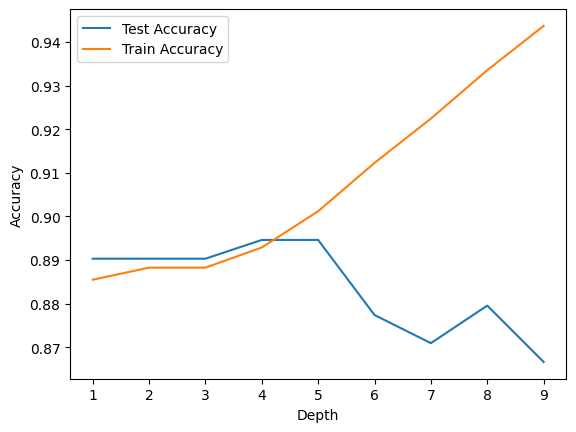

In [22]:
train_acc=[]
test_acc=[]
list_score=[]
p=[]

for i in range(1, 10):

    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)
    dtc.fit(xTrain, yTrain)

    train_pred = dtc.predict(xTrain)
    #train_acc.append(score(train_pred, yTrain))

    test_pred = dtc.predict(xTest)
    #test_acc.append(score(test_pred, yTest))
    test_acc = accuracy_score(yTest, test_pred)
    train_acc = accuracy_score(yTrain, train_pred)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_pred, yTrain),accuracy_score(test_pred, yTest)])


df2 = DataFrame (list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()


**Gradient Boost**

Train score: 0.9289012003693444 Test score: 0.8946236559139785


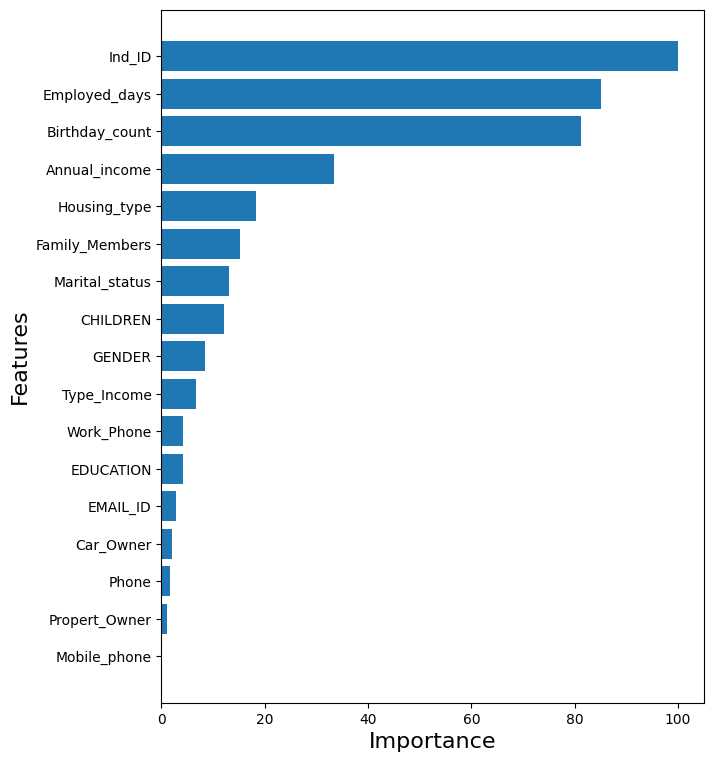

In [23]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

train_predict = clf.predict(xTrain)
test_predict = clf.predict(xTest)


test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)



# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(7, 9))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.keys()[sorted_idx])
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Features',fontsize=16)
plt.show()

**XGBoost**

In [24]:
# fit model to training data
model = XGBClassifier()
model.fit(xTrain, yTrain)

train_predict = model.predict(xTrain)
test_predict = model.predict(xTest)

test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)

Train score: 0.9935364727608494 Test score: 0.9118279569892473


**KNN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(xTrain,yTrain)

train_predict = knn.predict(xTrain)
test_predict = knn.predict(xTest)

test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)

Train score: 0.8984302862419206 Test score: 0.8666666666666667


Train score: 0.9325946445060018 Test score: 0.886021505376344
2 Train score: 0.9325946445060018 Test score: 0.886021505376344
Train score: 0.9205909510618652 Test score: 0.8580645161290322
3 Train score: 0.9205909510618652 Test score: 0.8580645161290322
Train score: 0.9067405355493998 Test score: 0.8731182795698925
4 Train score: 0.9067405355493998 Test score: 0.8731182795698925
Train score: 0.8984302862419206 Test score: 0.8666666666666667
5 Train score: 0.8984302862419206 Test score: 0.8666666666666667
Train score: 0.8910433979686058 Test score: 0.875268817204301
6 Train score: 0.8910433979686058 Test score: 0.875268817204301
Train score: 0.8882733148661126 Test score: 0.8666666666666667
7 Train score: 0.8882733148661126 Test score: 0.8666666666666667
Train score: 0.8864265927977839 Test score: 0.886021505376344
8 Train score: 0.8864265927977839 Test score: 0.886021505376344
Train score: 0.8808864265927978 Test score: 0.8774193548387097
9 Train score: 0.8808864265927978 Test score: 0

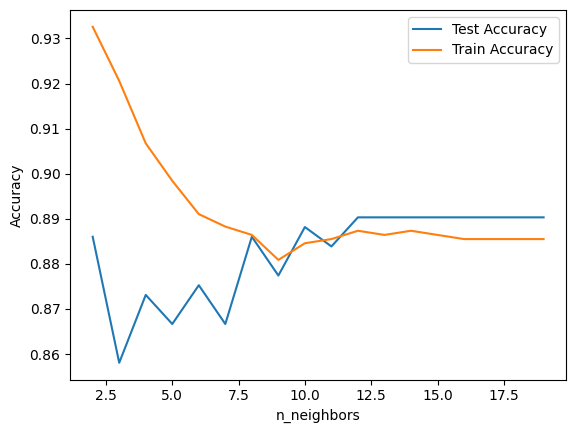

In [26]:
from sklearn.neighbors import KNeighborsClassifier

train_acc=[]
test_acc=[]
list_score=[]

for i in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(xTrain,yTrain)

    train_predict = knn.predict(xTrain)
    test_predict = knn.predict(xTest)

    test_acc = accuracy_score(yTest, test_predict)
    train_acc = accuracy_score(yTrain, train_predict)
    print('Train score:',train_acc,'Test score:',test_acc)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_predict, yTrain),accuracy_score(test_predict, yTest)])


df3 = DataFrame (list_score,columns=['n_neighbors','Train Accuracy','Test Accuracy'])
plt.plot(df3['n_neighbors'],df3['Test Accuracy'],label='Test Accuracy')
plt.plot(df3['n_neighbors'],df3['Train Accuracy'],label='Train Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

**Logistic Regression**

In [27]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledxTrain = scaler.fit_transform(xTrain)
rescaledxTest = scaler.fit_transform(xTest)

In [28]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledxTrain, yTrain)

LogisticRegression()

In [29]:
LogisticRegression()

LogisticRegression()

In [30]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledxTest)
y_pred1 = logreg.predict(rescaledxTrain)

# Get the accuracy score of logreg model and print it
print("Test: Accuracy = ", logreg.score(rescaledxTest,yTest))
print("Train: Accuracy = ", logreg.score(rescaledxTrain,yTrain))

# Print the confusion matrix of the logreg model
confusion_matrix(yTest,y_pred)

Test: Accuracy =  0.8903225806451613
Train: Accuracy =  0.8855032317636196


array([[414,   0],
       [ 51,   0]])

**Top model**

Gradient boosting classifier

**Summary**

We built a machine learning-based classifier that predicts if a credit card application will get approved or not, based on the information provided in the application.

While building this credit card approval predictor, we learned about common preprocessing steps such as feature scaling, label encoding, and handling missing values.

We implemented five different machine learning models, optimized the hyperparameters, and evaluated the performance using the accuracy score and comparing the performance between train and test data.

We have used python’s machine learning libraries to implement machine learning algorithms.

**Use only the cleaned data for SQL part of the project**

In [31]:
import duckdb
conn=duckdb.connect()

In [32]:
conn.register("df",df)

In [33]:
conn.execute("select * from df").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,None,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,None,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,None,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,None,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,None,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-11957.000000,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.000000,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,-13174.000000,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.000000,-645,1,1,1,0,Drivers,2,0


**1.Group the customers based on their income type and find the average of their annual income.**

In [34]:
conn.execute("""SELECT Type_Income, AVG(Annual_income) AS average_income
FROM df
GROUP BY Type_Income""").fetchdf()

,Type_Income,average_income
0,Pensioner,155713.746487
1,Working,181191.434321
2,State servant,211422.413793
3,Commercial associate,233653.135917


**2.Find the female owners of cars and property.**

In [35]:
conn.execute("""SELECT c.GENDER, c.Car_Owner, c.Propert_Owner
FROM df c
WHERE c.Gender = 'F' AND (c.Car_Owner = 'Y' and c.Propert_Owner = 'Y')""").fetchdf()

,GENDER,Car_Owner,Propert_Owner
0,F,Y,Y
1,F,Y,Y
2,F,Y,Y
3,F,Y,Y
4,F,Y,Y
...,...,...,...
174,F,Y,Y
175,F,Y,Y
176,F,Y,Y
177,F,Y,Y


**3.Find the male customers who are staying with their families.**

In [36]:
conn.execute('''SELECT c.GENDER, c.Marital_status,c.Family_Members
FROM df c
WHERE c.GENDER = 'M' AND Housing_type = 'With parents' ''').fetchdf()

,GENDER,Marital_status,Family_Members
0,M,Married,3
1,M,Married,2
2,M,Married,2
3,M,Married,2
4,M,Single / not married,1
5,M,Single / not married,1
6,M,Married,2
7,M,Separated,1
8,M,Married,2
9,M,Married,4


**4.Please list the top five people having the highest income.**

In [37]:
conn.execute(''' SELECT Annual_income
FROM df
ORDER BY Annual_income DESC
LIMIT 5 ''').fetchdf()

,Annual_income
0,1575000.0
1,1575000.0
2,900000.0
3,900000.0
4,900000.0


**5.How many married people are having bad credit?**

In [38]:
conn.execute('''SELECT COUNT(*) AS MarriedWithCredit
FROM df
WHERE Marital_status = 'Married' AND label = 0 ''').fetchdf()

,MarriedWithCredit
0,935


**6.What is the highest education level and what is the total count?**

In [39]:
conn.execute('''SELECT EDUCATION, COUNT(*) AS EducationCount
FROM df
GROUP BY EDUCATION
ORDER BY EducationCount DESC
LIMIT 1 ''').fetchdf()

,EDUCATION,EducationCount
0,Secondary / secondary special,1031


**7.Between married males and females, who is having more bad credit?**

In [40]:
conn.execute('''SELECT GENDER, Marital_status, COUNT(*) AS BadCreditCount
FROM df
WHERE Marital_status = 'Married' AND label = 0
GROUP BY GENDER, Marital_status ''').fetchdf()

,GENDER,Marital_status,BadCreditCount
0,F,Married,566
1,M,Married,369
